***
***
# Control de Mosquitos
***
***
Integrantes:
- Dafne Valeria Castellanos Rosas
- Diryon Yonith Mora Romero
- Fabio Andres Rizo Montoya
- Laura Valentina Gonzalez Rodriguez

***
***
## Importar modulos

Este código carga varias librerías de Python, define algunos escenarios y tipos de datos, y utiliza el solucionador "Runge Kutta" para simular el comportamiento de poblaciones de mosquitos en diferentes escenarios. También puede generar gráficos para visualizar los resultados de la simulación.

In [69]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import json

from typing import Any
from src.scenarios import ScenarioA, ScenarioB, ScenarioC, Scenario
from src.scenarios.common.utils import merge_mosquito_populations, get_empty_mosquito_populations, get_empty_mosquito_population
from src.scenarios.common.types import MosquitoPopulation
from src.solvers import RungeKutta

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


***
***
## Inicializar escenarios

Este código define tres diferentes escenarios de simulación de poblaciones de mosquitos, utilizando un solucionador numérico llamado "RungeKutta" para resolver las ecuaciones matemáticas detrás de cada escenario. Cada escenario tiene diferentes condiciones iniciales y parámetros que determinan cómo evolucionan las poblaciones de mosquitos en el tiempo, definidos según la tabla del proyecto.

In [70]:
scenario_a = ScenarioA(RungeKutta)
scenario_b = ScenarioB(RungeKutta)
scenario_c = ScenarioC(RungeKutta)

***
***
## Resultados de las poblaciones de mosquitos

Este código calcula los datos de crecimiento de mosquitos para diferentes escenarios en diferentes puntos de tiempo. Utiliza objetos previamente definidos llamados scenarios que representan los diferentes escenarios. La duración de cada escenario se define por un arreglo llamado time_lapses. El código recorre los escenarios y para cada uno de ellos, calcula los datos de crecimiento de mosquitos en diferentes puntos de tiempo usando los valores de inicio y finalización de cada escenario. Luego, devuelve los datos de crecimiento de mosquitos para cada escenario y cada punto.

In [71]:
scenarios = {
    "scenario_a": scenario_a,
    "scenario_b": scenario_b,
    "scenario_c": scenario_c,
}

number_of_points = 50
time_lapses = np.linspace(0, 12, number_of_points)

def get_term_data(time_lapses):
    term_data = {
        "scenario_a": get_empty_mosquito_populations(),
        "scenario_b": get_empty_mosquito_populations(),
        "scenario_c": get_empty_mosquito_populations(),
    }
    for scenario_key, scenario_value in scenarios.items():
        scenario_value.beginning_number_of_months = 0
        for final_number_of_months in time_lapses:
            scenario_value.final_number_of_months = final_number_of_months
            term_data[scenario_key] = merge_mosquito_populations(
                term_data[scenario_key],
                scenario_value.get_mosquito_populations(),
            )
    return term_data

term_data = get_term_data(time_lapses)

***
### Escenario A

Este código es una función que genera un gráfico con datos de diferentes escenarios. El argumento que se le pasa a la función determina cuál de los escenarios se graficará. El gráfico muestra dos filas, que corresponden a los dos coeficientes de crecimiento poblacional y tres columnas, que corresponden a los tres diferentes conjuntos 1, 2 y 3. Cada celda contiene un gráfico que muestra cómo evolucionan los valores de la población de mosquitos (en millones) a lo largo del tiempo (en meses) en un escenario específico.

A continuación se muestra las gráficas para el escenario A: Uso de Insecticidas.

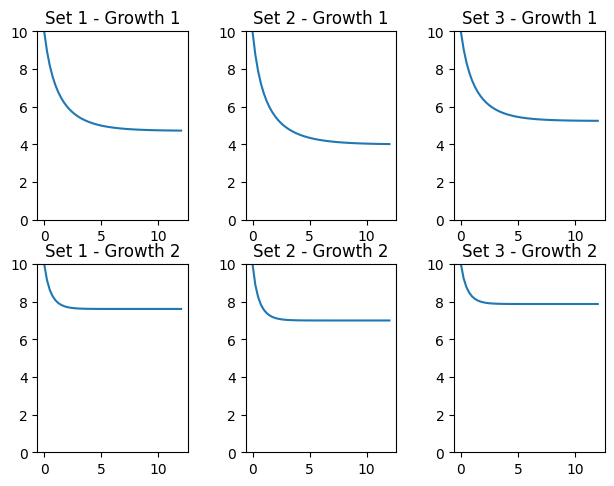

In [72]:
def plot_scenario(scenario: str):
    fig, axs = plt.subplots(2, 3)
    fig.tight_layout()
    for set_ind, set_key in enumerate(term_data[scenario].keys()):
        for growth_ind, (growth_key, growth_value) in enumerate(
            term_data[scenario][set_key].items()
        ):
            axs[growth_ind][set_ind].plot(time_lapses, growth_value)
            axs[growth_ind][set_ind].set_title(
                f"{set_key.replace('_', ' ').capitalize()} - {growth_key.replace('_', ' ').capitalize()}"
            )
            axs[growth_ind][set_ind].set_ylim([0, 10])


plot_scenario("scenario_a")

***
### Escenario B
A continuación se muestra las gráficas para el escenario B: Eliminación de Criaderos.

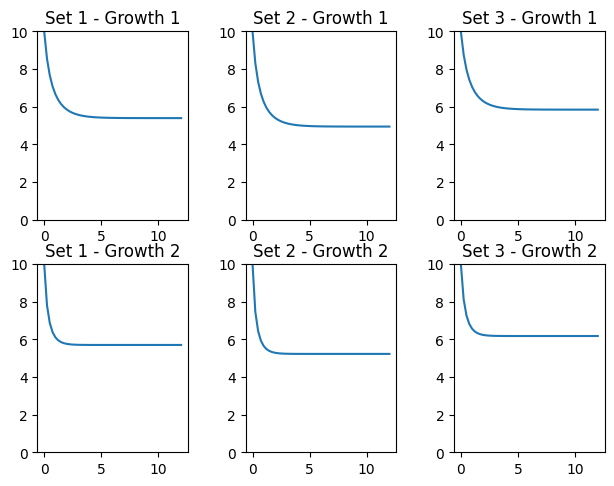

In [73]:
plot_scenario("scenario_b")

***
### Escenario C
A continuación se muestra las gráficas para el escenario C: Combinación de Métodos.

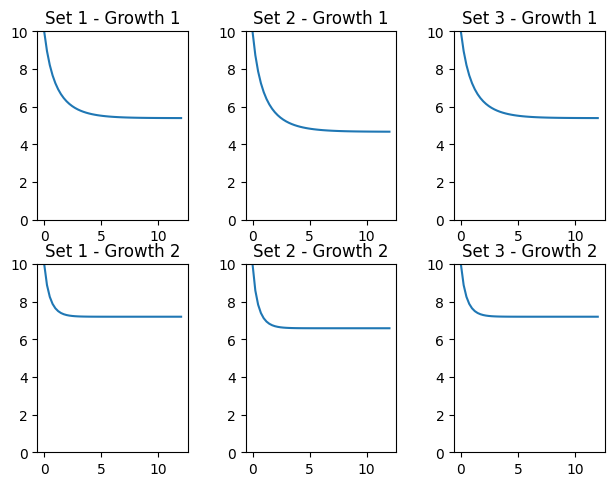

In [74]:
plot_scenario("scenario_c")

***
### Escenarios por medias

Este código define una función que toma un conjunto de datos de términos y calcula la media de los valores de mosquito en cada uno de los tres escenarios. Cada escenario se representa por una letra (a, b, c). La función agrupa los datos por escenario y por tipo de crecimiento del mosquito y calcula la media de los valores de cada tipo de crecimiento. Luego devuelve los datos de la media de cada tipo de crecimiento para cada escenario. Se muestra la información de las medias, para una mejor visualización ver la tabla del documento.

In [76]:
def get_mean_term_data(term_data):
    mean_term_data = {
        "scenario_a": get_empty_mosquito_population(),
        "scenario_b": get_empty_mosquito_population(),
        "scenario_c": get_empty_mosquito_population(),
    }

    for scenario_key, scenario_value in term_data.items():
        for growth_key in MosquitoPopulation.keys():
            for set_value in scenario_value.values():
                if len(mean_term_data[scenario_key][growth_key]) == 0:
                    mean_term_data[scenario_key][growth_key] = [[] for _ in range(len(set_value[growth_key]))]  # type: ignore
                for growth_ind, growth in enumerate(set_value[growth_key]):  # type: ignore
                    mean_term_data[scenario_key][growth_key][growth_ind].append(growth)
            mean_term_data[scenario_key][growth_key] = [
                np.mean(x) for x in mean_term_data[scenario_key][growth_key]
            ]

    return mean_term_data


int_time_lapses = np.arange(0, 13)
int_term_data = get_term_data(int_time_lapses)
int_mean_term_data = get_mean_term_data(int_term_data)
print(json.dumps(int_mean_term_data, indent=4))

{
    "scenario_a": {
        "growth_1": [
            10.0,
            7.061823022299109,
            5.951032921904845,
            5.409404643581856,
            5.112794081000316,
            4.939899500799739,
            4.835368302011784,
            4.770725094408415,
            4.730162191439916,
            4.7044595832764715,
            4.688061946618051,
            4.677548814732415,
            4.670783124049847
        ],
        "growth_2": [
            10.0,
            7.963442035326328,
            7.601040691689522,
            7.520436070944188,
            7.501647027088531,
            7.497213157287071,
            7.496161997616191,
            7.495911964837944,
            7.495852261086013,
            7.495837929256862,
            7.495834463036271,
            7.495833615783539,
            7.495833405609273
        ]
    },
    "scenario_b": {
        "growth_1": [
            10.0,
            6.636182015465472,
            5.842033860966502,
     

A continuación se muestra un gráfico con la media de los valores de mosquito en diferentes escenarios. Los datos de la media de cada escenario se pasan a la función como argumento. El gráfico muestra dos filas, que corresponden a los dos coeficientes de crecimiento poblacional y tres columnas, que corresponden a los tres diferentes conjuntos 1, 2 y 3. Cada celda contiene un gráfico que muestra cómo evolucionan los valores de la población de mosquitos (en millones) a lo largo del tiempo (en meses) en un escenario específico.

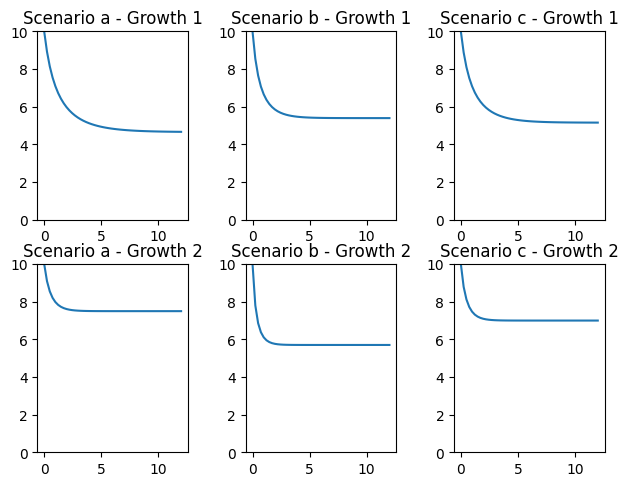

In [77]:
def plot_means(mean_term_data):
    fig, axs = plt.subplots(2, 3)
    fig.tight_layout()
    for scenario_ind, (scenario_key, scenario_value) in enumerate(
        mean_term_data.items()
    ):
        for growth_ind, (growth_key, growth_value) in enumerate(scenario_value.items()):
            axs[growth_ind][scenario_ind].plot(time_lapses, growth_value)
            axs[growth_ind][scenario_ind].set_title(
                f"{scenario_key.replace('_', ' ').capitalize()} - {growth_key.replace('_', ' ').capitalize()}"
            )
            axs[growth_ind][scenario_ind].set_ylim([0, 10])


mean_term_data = get_mean_term_data(term_data)
plot_means(mean_term_data)


***
***